# TP2

## Valores faltantes

# Ejercicio 1

- Leer y obtener el siguiente dataset sobre <a href="https://archive.ics.uci.edu/ml/datasets/Sponge">esponjas</a>
- Analizar la naturaleza y distribución de los datos faltantes
- Selecccionar e implementar el mejor método para tratar los datos faltantes
- Justificar la elección


In [1]:
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Leer csv
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/sponge/sponge.data')

df

,AAPTOS_AAPTOS,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO.1,NO.2,3,NO.3,SIN_TILOSTILOS_ADICIONALES,...,MASIVO_IRREGULAR,0,NO.12,OTROS,RUGOSA,RADIAL,NO.13,NO.14,NO.15,DURO
0,ALECTONA_MILLARI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,0,NO,?,LISA,CONFUSA,NO,SI,NO,DURO
1,CLIONA_CARTERI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,1,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
2,CLIONA_CELATA,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,MASIVO_IRREGULAR,3,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
3,CLIONA_LABYRINTHICA,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,0,NO,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
4,CLIONA_SCHMIDTI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,1,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,TRICHOSTEMA_HEMISPHAERICUM,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO,NO,4,NO,INTERMEDIARIOS_Y_ECTOSOMICOS,...,HEMISFERICA,2,SI,OTROS,FRANJA_BASAL_DE_ESPICULAS_EN_FLECO,RADIAL,NO,NO,NO,BLANDO
71,TRICHOSTEMA_SARSI,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO,NO,3,NO,INTERMEDIARIOS_Y_ECTOSOMICOS,...,DE_CONO_INVERTIDO,2,SI,?,FRANJA_BASAL_DE_ESPICULAS_EN_FLECO,RADIAL,NO,NO,NO,BLANDO
72,TYLEXOCLADUS_JOUBINI,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO,NO,3,NO,ECTOSOMICOS_EN_RAMILLETES,...,DE_REVESTIMIENTO,0,NO,?,HISPIDEZ_MAYOR_HACIA_LA_BASE,RADIAL,NO,NO,NO,DURO
73,WEBERELLA_BURSA,2_CAPAS,TANGENCIAL,SI,SI,NO,NO,3,NO,INTERMEDIARIOS_Y_ECTOSOMICOS,...,GLOBULOSA,2,SI,OTROS,ATERCIOPELADA,RADIAL_EN_PERIFERIA,NO,NO,NO,DURO


Al observar la tabla podemos comprobar que los datos faltantes estan asignados con un signo de interrogacion.

In [2]:
empty = []
for column in df.columns:
    attribute = {}
    attribute["column"] = column
    attribute["percentage"] = np.mean(df[column] == '?')*100
    attribute["quantity"] = np.sum(df[column] == '?')
    empty.append(attribute)
    
empty_df = pd.DataFrame(empty)

empty_df

,column,percentage,quantity
0,AAPTOS_AAPTOS,0.000000,0
1,1_CAPA,0.000000,0
2,SIN_CAPA_INTERNA_DEL_CORTEX,0.000000,0
3,SI,0.000000,0
4,NO,0.000000,0
5,NO.1,0.000000,0
6,NO.2,0.000000,0
7,3,0.000000,0
8,NO.3,0.000000,0
9,SIN_TILOSTILOS_ADICIONALES,0.000000,0


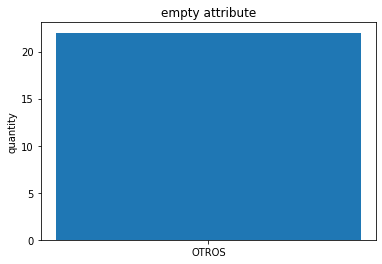

In [7]:
empty_df = empty_df.sort_values('quantity', ascending=False)

df_fl_c = empty_df.loc[(empty_df['quantity'] > 0)]

plt.bar(df_fl_c["column"], df_fl_c["quantity"])
plt.ylabel('quantity')
plt.title('empty attribute')
plt.show()

Al realizar la busqueda de datos podemos observar que hay datos faltantes solo en una columna la cual tiene el nombre "OTROS" pudimos observar que faltan 22 datos en esta columna por lo cual optamos por la utilizar el metodo de graficar cantidad de datos faltantes ya que nos mostraria la cantidad de datos que faltan en esa columna

# Ejercicio 2

- Leer y obtener el siguiente dataset sobre <a href="https://archive.ics.uci.edu/ml/datasets/Echocardiogram">ecocardiogramas</a>
- Analizar la naturaleza y distribución de los datos faltantes
- Selecccionar e implementar el mejor método para tratar los datos faltantes
- Justificar la elección


In [11]:
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.data', error_bad_lines=False)

df

b'Skipping line 50: expected 13 fields, saw 14\n'


,11,0,71,0.1,0.260,9,4.600,14,1,1.1,name,1.2,0.2
0,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
1,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
2,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
3,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
4,26,0,68,0,0.260,5,4.310,12,1,0.857,name,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,7.5,1,64,0,0.24,12.9,4.72,12,1,0.857,name,?,?
126,41,0,64,0,0.28,5.40,5.47,11,1.10,0.714,name,?,?
127,36,0,69,0,0.20,7.00,5.05,14.5,1.21,0.857,name,?,?
128,22,0,57,0,0.14,16.1,4.36,15,1.36,0.786,name,?,?


Al analizar la tabla pudimos observar que en la linea 50 se producia un desplazamiento hacia la derecha, por este motivo al leer el archivo pandas lo descarta, ya que si lo conserva generaria una nueva columna que rellenaria sin valores alguno excepto esa linea 50

In [12]:
empty = []
for column in df.columns:
    attribute = {}
    attribute["column"] = column
    attribute["percentage"] = np.mean(df[column] == '?')*100
    attribute["quantity"] = np.sum(df[column] == '?')
    empty.append(attribute)
    
empty_df = pd.DataFrame(empty)

empty_df

,column,percentage,quantity
0,11,0.769231,1
1,0,0.000000,0
2,71,3.846154,5
3,0.1,0.000000,0
4,0.260,5.384615,7
5,9,10.769231,14
6,4.600,7.692308,10
7,14,2.307692,3
8,1,0.769231,1
9,1.1,2.307692,3


Visualizamos los datos faltantes y observamos que hay datos faltantes en varias columnas

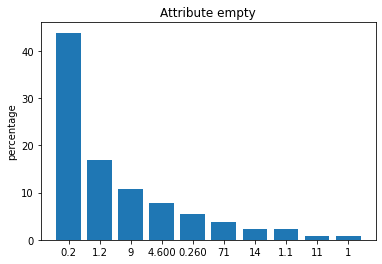

In [15]:
# Ordenar por porcentaje descendente
empty_df = empty_df.sort_values('percentage', ascending=False)

# Filtrar por porcentaje mayor a 0
df_fl_p = empty_df.loc[(empty_df['percentage'] > 0)]

# Graficar
plt.bar(df_fl_p["column"], df_fl_p["percentage"])
plt.ylabel('percentage')
plt.title('Attribute empty')
plt.show()

Al realizar la busqueda de datos podemos observar que hay datos faltantes en varias columnas por eso utilizamos el metodo de porcentajes para tener una mejor visualizacion en porcentaje de los faltantes y de esta manera poder ver que ninguna supera el 50%. 